# Lesson 07 - Working with Raster Data

### Objectives:

- Introduce `arcpy.Raster`
- Introduce Map Algebra

## Raster Data

<img src="https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-6754AF39-CDE9-4F9D-8C3A-D59D93059BDD-web.png"/>

- consists of a matrix of cells in a grid
- each grid contains numerical values

## Uses of Raster Data

### Represents real-world phenomena:

<img src="https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-327EC884-91B2-4EAF-8BC2-FE2F79B26DA8-web.gif"/>

- Thematic data (also known as discrete) represents features such as land-use or soils data.
- Continuous data represents phenomena such as temperature, elevation, or spectral data such as satellite images and aerial photographs.
- Pictures include scanned maps or drawings and building photographs.


## Supported Raster Formats

- ArcPy support many formats
- Common formats: geotiff, jpg, Grids, ...
- Click [here](https://pro.arcgis.com/en/pro-app/help/data/imagery/supported-raster-dataset-file-formats.htm) to see the full list

## Reading Raster Data

- `arcpy.Raster` allows for the direct consumption of raster data

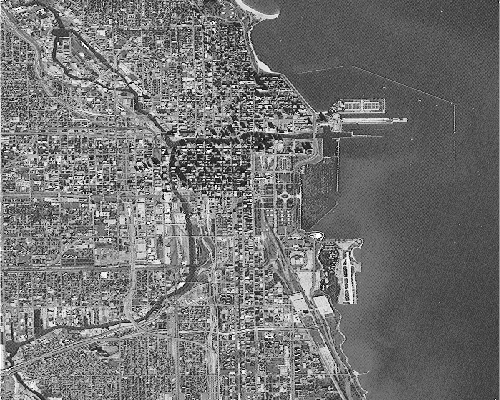

In [9]:
import arcpy
chicago = arcpy.Raster("./data/SP27GTIF.tiff")
chicago

## What Can the `arcpy.Raster` Do?

- Perform map algebra (raster analysis)
- Act as inputs to tools
- Create new raster products.
- Obtain information about the data
- Click [here](https://pro.arcgis.com/en/pro-app/arcpy/classes/raster-object.htm) for Raster object documentation

In [13]:
print(f"Band Count {chicago.bandCount}")
print(f"Compression {chicago.compressionType}")
print(f"Cell height {chicago.height}")
print(f"Cell Width {chicago.width}")


Band Count 1
Compression None
Cell height 929
Cell Width 699


## Map Algebra 

-  **Map Algebra** is a simple and powerful algebra with which you can execute all Spatial Analyst tools, operators, and functions to perform geographic analysis. (source Esri)
- Use this short/simplified syntax instead of calling **arcpy** tools

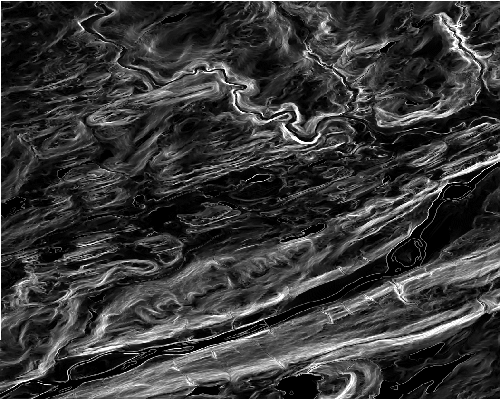

In [21]:
from arcpy.sa import Slope, Aspect
dem = arcpy.Raster("./data/bushkill_pa.dem")
slope = Slope(dem)
aspect = Aspect(dem)
slope

## Performing Simple Calculations

- Accepts boolean operations like `if` statements

In [24]:
big_slopes = slope > 35
big_slopes.save("./data/big_slopes")

## Converting Raster to Feature Classes

- ArcPy support creating Rasters to Feature Classes

In [ ]:
import os
import pandas as pd
import arcgis
out_fc = arcpy.conversion.RasterToPolygon(in_raster=big_slopes,
                                 out_polygon_features=os.path.join(arcpy.env.scratchGDB, "bigslopes"))[0]

In [33]:
sdf = pd.DataFrame.spatial.from_featureclass(out_fc)
sdf[sdf.gridcode == 1].spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

## Additional Video Assignment

- link will be posted on blackboard.

In [7]:
from IPython.display import HTML, IFrame
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/Nw9L8HfShVE" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" ></iframe>')